# RUN IN PYTHON

In [1]:
# pip install h5py

In [2]:
import h5py
import json
import numpy as np

# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
import matplotlib.colors as mcolors

import networkx as nx
import matplotlib.pyplot as plt

In [3]:
with open('inputs/info.json', 'r') as f:
    info_json = json.load(f)
cand_factories = np.array(info_json['factories'])
demands = np.array(info_json['demands'])

with h5py.File('results/output.h5', 'r') as f:
    # List all datasets
    print("Datasets in the file:", list(f.keys()))
    factory_indic = f['factories'].__array__() #indicator for each factory
    x_edges = f['x_edges'].__array__()
    y_edges = f['y_edges'].__array__()
    z_edges = f['z_edges'].__array__()

_,M,N = y_edges.shape

Datasets in the file: ['factories', 'x_edges', 'y_edges', 'z_edges']


In [ ]:
# fig, ax = plt.subplots(figsize=(6, 6))
# size = 10
# width = 0.3

# # Set the grid
# ax.set_xlim(-width, size)
# ax.set_ylim(-width, size)
# ax.grid(True, which='both', color='lightgray', linewidth=0.5)

color_list = list(mcolors.XKCD_COLORS.keys())
# color_list = ['red', 'blue', 'orange', 'green', 'pink', 'black', 'white']
# color_num = 0

G = nx.DiGraph()
for i in range(len(cand_factories)):
    color = 'grey'
    if factory_indic[i] == 1:
        color = 'blue'
    G.add_node(str(i) + 'F', color=color, pos=cand_factories[i])

G.add_nodes_from(
    [(str(i) + 'D', {"color": 'red', 'pos': demands[i]}) for i in range(len(demands))]
)

color_num = 0
for truck_num in range(N):
    #Factory --> Demand
    idxs = np.where(y_edges[truck_num, :, :])
    idx1_list, idx2_list = idxs #all demand 1's, all demand 2's
    for idx1, idx2 in zip(idx1_list, idx2_list):
        G.add_edge((str(idx1) + 'F'), (str(idx2) + 'D'), color = color_list[color_num])

    #Demand --> Factory
    idxs = np.where(z_edges[truck_num, :, :])
    print(idxs)
    idx1_list, idx2_list = idxs #all demand 1's, all demand 2's
    for idx1, idx2 in zip(idx1_list, idx2_list):
        G.add_edge((str(idx1) + 'D'), (str(idx2) + 'F'), color = color_list[color_num])

    break
# for truck_num in range(N):
#     #Demand 1 --> Demand 2 Edges (x)
#     # idxs = np.where(x_edges[truck_num, :, :])
#     # idx1_list, idx2_list = idxs #all demand 1's, all demand 2's
#     # for idx1, idx2 in zip(idx1_list, idx2_list):
#     #     loc1 =  demands[idx1]
#     #     loc2 =  demands[idx2]
#     #     ax.plot([loc1[0], loc2[0]], [loc1[1], loc2[1]], color = color_list[color_num])

#     #Factory --> Edge
#     idxs = np.where(y_edges[truck_num, :, :])
#     idx1_list, idx2_list = idxs #all factories, all demands
#     for idx1, idx2 in zip(idx1_list, idx2_list):
#         #print(idx1, idx2)
#         loc1 =  cand_factories[idx1]
#         loc2 =  demands[idx2]
#         #print(loc1, loc2)
#         #ax.plot([loc1[0], loc2[0]], [loc1[1], loc2[1]], color = color_list[color_num], linestyle='--')
#         bezier = patches.PathPatch(
#             patches.Path(
#                 # [loc1, ((loc1[0] + loc2[0])/2, (loc1[1] + loc2[1])/2 + -3 * random.random() + 3), loc2],  # Control points
#                 [patches.Path.MOVETO, patches.Path.CURVE3, patches.Path.CURVE3]
#             ),
#             edgecolor='blue', linewidth=2, facecolor='none'
#         )
#         ax.add_patch(bezier)
#         color_num += 1


#     # idxs = np.where(z_edges[truck_num, :, :])
#     # idx1_list, idx2_list = idxs #all factories, all demands
#     # for idx1, idx2 in zip(idx1_list, idx2_list):
#     #     loc1 =  demands[idx1]
#     #     loc2 =  cand_factories[idx2]
#     #     ax.plot([loc1[0], loc2[0]], [loc1[1], loc2[1]], color = color_list[color_num])


# for factory in built_factories:
#     circ = patches.Circle((factory[0], factory[1]), width, edgecolor='none', facecolor='blue')
#     ax.add_patch(circ)

# for demand_loc in demands:
#     cir = patches.Circle((demand_loc[0], demand_loc[1]), width, edgecolor='none', facecolor='red')
#     ax.add_patch(cir)


(array([2]), array([0]))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


['0F', '1F', '2F', '3F', '4F', '5F', '6F', '7F', '8F', '9F', '10F', '11F', '12F', '13F', '14F', '15F', '16F', '17F', '18F', '19F', '20F', '21F', '0D', '1D', '2D']
[('0F', '0D'), ('9F', '1D'), ('9F', '2D'), ('2D', '0F')]


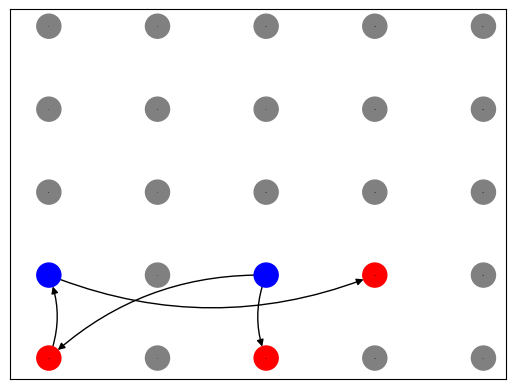

In [8]:
print(G.nodes)
print(G.edges)
node_colors = [G.nodes[node]['color'] for node in G.nodes]
pos = nx.get_node_attributes(G, 'pos')  
nx.draw_networkx(G, pos=pos,node_color=node_colors, connectionstyle='arc3,rad=0.2', arrows=True, font_size=0)